# Laboratorio 1 - Inteligencia Artificial 

#### Sebastian Juárez - 21471
Link al repo: https://github.com/SebasJuarez/Lab1-CC3045

### Task 1 - Regresión Lineal

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Tomando en cuenta la ecuación, el 1 (que es una constante) no cambia. Esto es importante ya que nos da a entender que si X₂ aumenta en 1 unidad, el valor del peso, w₂, aumenta en 3 veces su valor original.

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La mulicolinealidad ocurre cuando dos o mas variables independientes están muy relacionadas entre si. Esto puede generar muchos problemas al ver los resultados ya que son poco fiables y pueden ser algo inestables. 

En terminos de la regresion individual, esta tiene impacto en formas como la interpretación, cambios significativos en los coeficientes y muy importante en el aumento de la varianza de los coeficientes. 

### Task 2 - Clasificación de Sitios de Phishing Regresión Logística y KNN

#### Analisi exploratorio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = "data/train.csv"
df = pd.read_csv(file)

In [3]:
df.head(3)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing


### Regresion Logistica - Codigo desde cero

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4146
Epoch 200, Loss: 0.3763
Epoch 300, Loss: 0.3610
Epoch 400, Loss: 0.3529
Epoch 500, Loss: 0.3480
Epoch 600, Loss: 0.3450
Epoch 700, Loss: 0.3429
Epoch 800, Loss: 0.3416
Epoch 900, Loss: 0.3407
Exactitud en el conjunto de prueba: 0.8758


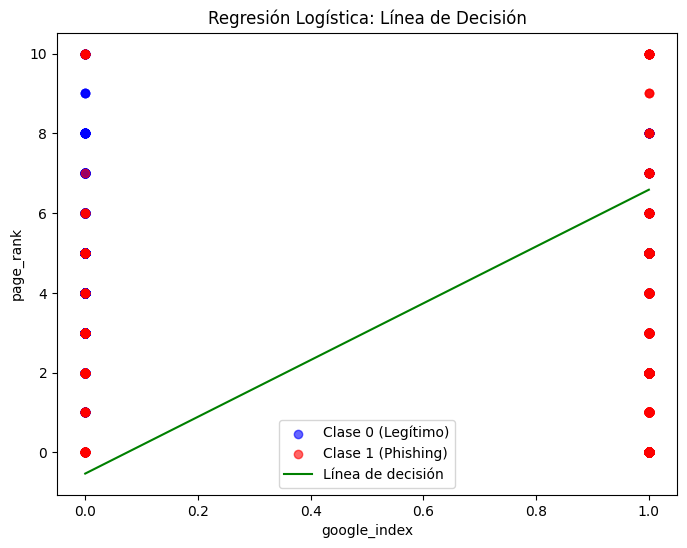

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# --- Preparación de los datos ---

selected_features = ['google_index', 'page_rank']
X = df[selected_features].values
y = (df['status'] == 'phishing').astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Regresión Logística ---

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calculateLoss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

def calculateGradient(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    # Uso de las epocas
    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.mean(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        loss = calculateLoss(y, y_pred)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias, losses

learning_rate = 0.1
epochs = 1000

# Entrenar el modelo
weights, bias, losses = calculateGradient(X_train, y_train, learning_rate, epochs)

# --- Gráficas ---

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    return (sigmoid(z) >= 0.5).astype(int)

# Predicciones en el conjunto de prueba
y_pred = predict(X_test, weights, bias)

# Métricas
accuracy = np.mean(y_pred == y_test)
print(f"Exactitud en el conjunto de prueba: {accuracy:.4f}")

# Gráficas
def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Clase 0 (Legítimo)', alpha=0.6)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Clase 1 (Phishing)', alpha=0.6)
    
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color='green', label='Línea de decisión')

    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.legend()
    plt.title("Regresión Logística: Línea de Decisión")
    plt.show()

plot_decision_boundary(X_test, y_test, weights, bias)

### Regresion Logistica - Codigo con librerias

Exactitud en el conjunto de prueba: 0.8758


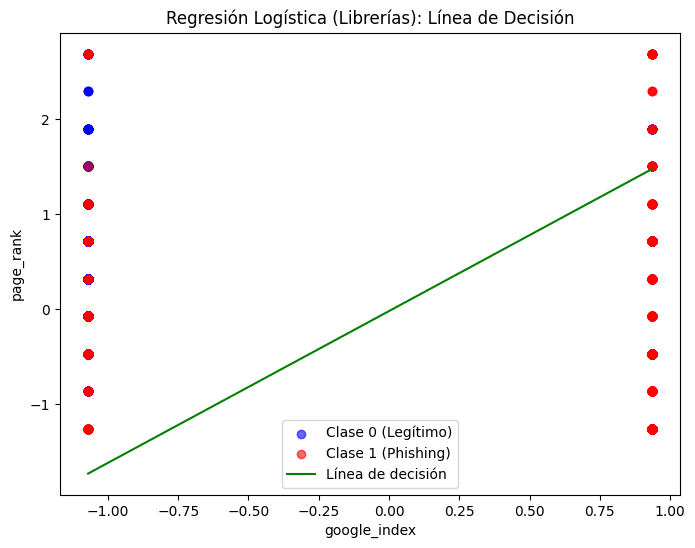

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- Preparación de los datos ---
selected_features = ['google_index', 'page_rank'] 
X = df[selected_features].values
y = (df['status'] == 'phishing').astype(int).values 


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Regresión Logística con librerías ---

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.4f}")

# --- Gráficas ---
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Clase 0 (Legítimo)', alpha=0.6)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Clase 1 (Phishing)', alpha=0.6)
    
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(model.coef_[0, 0] * x_values + model.intercept_[0]) / model.coef_[0, 1]
    plt.plot(x_values, y_values, color='green', label='Línea de decisión')

    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.legend()
    plt.title("Regresión Logística (Librerías): Línea de Decisión")
    plt.show()

plot_decision_boundary(X_test, y_test, model)

### K-Nearest Neighbors - Codigo desde cero

Exactitud en el conjunto de prueba: 0.8815


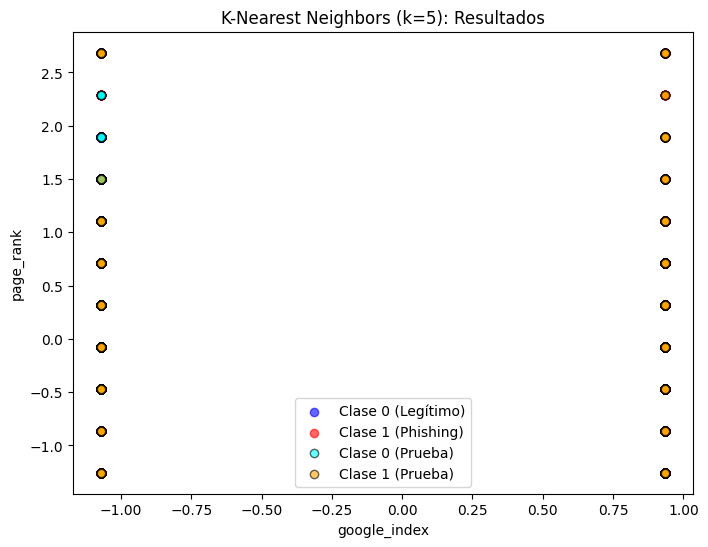

In [ ]:
# --- Preparación de los datos ---

selected_features = ['google_index', 'page_rank']
X = df[selected_features].values
y = (df['status'] == 'phishing').astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- K-Nearest Neighbors desde cero ---

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        
        k_neighbors_indices = np.argsort(distances)[:k]
        k_neighbors_labels = y_train[k_neighbors_indices]
        
        most_common = np.bincount(k_neighbors_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

k = 5

y_pred = knn_predict(X_train, y_train, X_test, k)

accuracy = np.mean(y_pred == y_test)
print(f"Exactitud en el conjunto de prueba: {accuracy:.4f}")

# --- Gráficas ---
def plot_knn_decision_boundary(X_train, y_train, X_test, y_test, k):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Clase 0 (Legítimo)', alpha=0.6)
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Clase 1 (Phishing)', alpha=0.6)
    
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='cyan', label='Clase 0 (Prueba)', alpha=0.6, edgecolor='k')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Clase 1 (Prueba)', alpha=0.6, edgecolor='k')
    
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.legend()
    plt.title(f"K-Nearest Neighbors (k={k}): Resultados")
    plt.show()

plot_knn_decision_boundary(X_train, y_train, X_test, y_test, k)

### K-Nearest Neighbors - Codigo con librerias

Exactitud en el conjunto de prueba: 0.8250


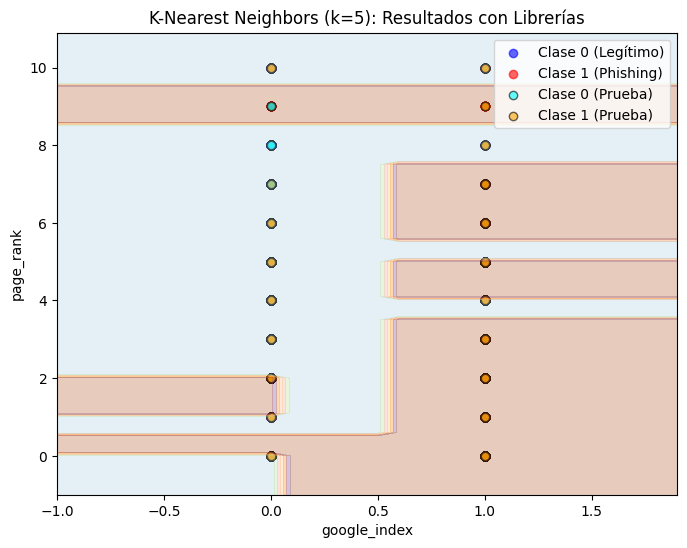

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- Preparación de los datos ---
selected_features = ['google_index', 'page_rank']
X = df[selected_features].values
y = (df['status'] == 'phishing').astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- K-Nearest Neighbors con librerías ---
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.4f}")

# --- Gráficas ---
def plot_knn_decision_boundary(X_train, y_train, X_test, y_test, model):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Clase 0 (Legítimo)', alpha=0.6)
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Clase 1 (Phishing)', alpha=0.6)
    
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='cyan', label='Clase 0 (Prueba)', alpha=0.6, edgecolor='k')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Clase 1 (Prueba)', alpha=0.6, edgecolor='k')
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.legend()
    plt.title(f"K-Nearest Neighbors (k={k}): Resultados con Librerías")
    plt.show()

plot_knn_decision_boundary(X_train, y_train, X_test, y_test, knn_model)

Se tomaron los datos de google y rank ya que el hecho de que google los indexe es sufientemente grande como para ser tomada en cuenta ya que google puede proveer sistemas de detección. Ademas, la variable de rank nos dice que tan popular es y es un hecho que muchas paginas populares pueden no ser phishing

En terminos de los resultados, vemos que el modelo desde cero y el modelo con librerias dieron el mismo resultado, pero llegando a ver el resultado del otro modelo, el usado con librerias dio un mejor resultado y las graficas se ven mejor